In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
# Specify filepaths and filenames.
loc = 'local'

if loc == 'cryocloud':
    filepath = '/home/jovyan/ML_MB_Norway_data/'
elif loc == 'local':
    filepath = 'Data/'

filename = '2023-06-27_stake_mb_norway_cleaned_ids_latlon_wattributes_climate.csv'

# Load data.
data = pd.read_csv(filepath + filename)

data
data.columns

Index(['RGIID', 'GLIMSID', 'BREID', 'utm_zone', 'utm_east_approx',
       'utm_north_approx', 'altitude_approx', 'location_description',
       'location_id', 'stake_no',
       ...
       'tp_jan', 'tp_feb', 'tp_mar', 'tp_apr', 'tp_may', 'tp_jun', 'tp_jul',
       'tp_aug', 'tp_sep', 'altitude_climate'],
      dtype='object', length=301)

In [3]:
# Make year column
data['year']=pd.to_datetime(data['dt_curr_year_max_date'].astype('string'), format="%d.%m.%Y %H:%M")
data['year'] = data.year.dt.year.astype('Int64')

In [4]:
# Get data for Nigardsbreen
glacier_data_all = data.loc[data['RGIID']=='RGI60-08.01126']

glacier_data_all
# 950 point measurements

,RGIID,GLIMSID,BREID,utm_zone,utm_east_approx,utm_north_approx,altitude_approx,location_description,location_id,stake_no,...,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep,altitude_climate,year
1930,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.003761,0.003825,0.004330,0.003294,0.003513,0.003269,0.005247,0.008278,1322.716089,1991
1931,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.015104,0.005939,0.001753,0.003413,0.005560,0.004863,0.006438,0.003316,1322.716089,1998
1932,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.011049,0.006357,0.004072,0.003126,0.008577,0.003506,0.005019,0.005079,1322.716089,2000
1933,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N100000,...,0.004909,0.002112,0.004616,0.003036,0.004256,0.005699,0.006093,0.002317,1322.716089,2001
1934,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N100002,...,0.007848,0.007098,0.001808,0.002955,0.005540,0.005827,0.003137,0.004228,1322.716089,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,RGI60-08.01126,G007099E61715N,2297,32,401670.0,6847020.0,1800.0,NaN,N99,N9968,...,0.001709,0.003372,0.002184,0.002967,0.003059,0.007892,0.003663,0.006336,1382.210502,1970
2876,RGI60-08.01126,G007099E61715N,2297,32,400520.0,6842250.0,1555.0,NaN,NaN,NA63,...,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834,1382.210502,1963
2877,RGI60-08.01126,G007099E61715N,2297,32,400350.0,6842570.0,1579.0,NaN,NC,NC63,...,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834,1382.210502,1963
2878,RGI60-08.01126,G007099E61715N,2297,32,400260.0,6840930.0,1612.0,NaN,NF,NF62,...,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234,1382.210502,1962


In [5]:
# Select columns

base_cols = ['balance_netto','year','lat','lon','altitude','aspect','slope','slope_factor','altitude_climate']
temp_cols = ['t2m_oct','t2m_nov','t2m_des','t2m_jan','t2m_feb','t2m_mar','t2m_apr','t2m_may','t2m_jun','t2m_jul','t2m_aug','t2m_sep']
prec_cols = ['tp_oct','tp_nov','tp_des','tp_jan','tp_feb','tp_mar','tp_apr','tp_may','tp_jun','tp_jul','tp_aug','tp_sep']

cols = [y for x in [base_cols, temp_cols, prec_cols] for y in x]
cols

['balance_netto',
 'year',
 'lat',
 'lon',
 'altitude',
 'aspect',
 'slope',
 'slope_factor',
 'altitude_climate',
 't2m_oct',
 't2m_nov',
 't2m_des',
 't2m_jan',
 't2m_feb',
 't2m_mar',
 't2m_apr',
 't2m_may',
 't2m_jun',
 't2m_jul',
 't2m_aug',
 't2m_sep',
 'tp_oct',
 'tp_nov',
 'tp_des',
 'tp_jan',
 'tp_feb',
 'tp_mar',
 'tp_apr',
 'tp_may',
 'tp_jun',
 'tp_jul',
 'tp_aug',
 'tp_sep']

In [6]:
# Select columns for Nigardsbreen
glacier_data = glacier_data_all[cols]

# Reset index of new dataframe
glacier_data.reset_index(drop=True, inplace=True)

glacier_data

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,altitude_climate,t2m_oct,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,-4.11,1991,61.694315,7.161649,974.0,2.465503,0.152608,3.089254,1322.716089,270.932251,...,0.007378,0.003445,0.003761,0.003825,0.004330,0.003294,0.003513,0.003269,0.005247,0.008278
1,-3.96,1998,61.694304,7.161498,1000.0,2.333727,0.143458,3.206009,1322.716089,268.193298,...,0.003372,0.005719,0.015104,0.005939,0.001753,0.003413,0.005560,0.004863,0.006438,0.003316
2,-3.70,2000,61.696900,7.158885,1019.0,2.962544,0.131003,3.385560,1322.716089,269.597687,...,0.005705,0.012997,0.011049,0.006357,0.004072,0.003126,0.008577,0.003506,0.005019,0.005079
3,-4.48,2001,61.694526,7.161315,974.0,2.333727,0.143458,3.206009,1322.716089,273.114014,...,0.002565,0.001720,0.004909,0.002112,0.004616,0.003036,0.004256,0.005699,0.006093,0.002317
4,-5.00,2002,61.693602,7.162674,962.0,2.401391,0.163659,2.962348,1322.716089,272.787598,...,0.003626,0.006165,0.007848,0.007098,0.001808,0.002955,0.005540,0.005827,0.003137,0.004228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.79,1970,61.743600,7.138086,1802.0,3.604919,0.086527,3.872423,1382.210502,271.784027,...,0.002970,0.001482,0.001709,0.003372,0.002184,0.002967,0.003059,0.007892,0.003663,0.006336
946,0.11,1963,61.700462,7.118957,1555.0,1.553582,0.192326,2.688917,1382.210502,271.547150,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
947,0.14,1963,61.703289,7.115569,1579.0,1.166986,0.140746,3.242939,1382.210502,271.547150,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
948,2.80,1962,61.693873,7.116522,1579.0,1.417386,0.232371,2.400438,1382.210502,272.531006,...,0.004000,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234


In [7]:
# Remove cells with nan in balance_netto.
#glacier_data['balance_netto'].notna()
glacier_data = glacier_data[glacier_data['balance_netto'].notna()]


In [8]:
glacier_data.reset_index(drop=True, inplace=True)
glacier_data

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,altitude_climate,t2m_oct,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,-4.11,1991,61.694315,7.161649,974.0,2.465503,0.152608,3.089254,1322.716089,270.932251,...,0.007378,0.003445,0.003761,0.003825,0.004330,0.003294,0.003513,0.003269,0.005247,0.008278
1,-3.96,1998,61.694304,7.161498,1000.0,2.333727,0.143458,3.206009,1322.716089,268.193298,...,0.003372,0.005719,0.015104,0.005939,0.001753,0.003413,0.005560,0.004863,0.006438,0.003316
2,-3.70,2000,61.696900,7.158885,1019.0,2.962544,0.131003,3.385560,1322.716089,269.597687,...,0.005705,0.012997,0.011049,0.006357,0.004072,0.003126,0.008577,0.003506,0.005019,0.005079
3,-4.48,2001,61.694526,7.161315,974.0,2.333727,0.143458,3.206009,1322.716089,273.114014,...,0.002565,0.001720,0.004909,0.002112,0.004616,0.003036,0.004256,0.005699,0.006093,0.002317
4,-5.00,2002,61.693602,7.162674,962.0,2.401391,0.163659,2.962348,1322.716089,272.787598,...,0.003626,0.006165,0.007848,0.007098,0.001808,0.002955,0.005540,0.005827,0.003137,0.004228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,0.79,1970,61.743600,7.138086,1802.0,3.604919,0.086527,3.872423,1382.210502,271.784027,...,0.002970,0.001482,0.001709,0.003372,0.002184,0.002967,0.003059,0.007892,0.003663,0.006336
909,0.11,1963,61.700462,7.118957,1555.0,1.553582,0.192326,2.688917,1382.210502,271.547150,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
910,0.14,1963,61.703289,7.115569,1579.0,1.166986,0.140746,3.242939,1382.210502,271.547150,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
911,2.80,1962,61.693873,7.116522,1579.0,1.417386,0.232371,2.400438,1382.210502,272.531006,...,0.004000,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234


In [12]:
# Sort values by year
glacier_data = glacier_data.sort_values(by=['year'])
glacier_data.reset_index(drop=True, inplace=True)
glacier_data

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,altitude_climate,t2m_oct,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,-3.59,1962,61.692518,7.165575,925.0,2.273733,0.175035,2.845278,1322.716089,272.650177,...,0.003817,0.008573,0.008103,0.001171,0.001844,0.001825,0.004144,0.001378,0.005737,0.005100
1,2.80,1962,61.693873,7.116522,1579.0,1.417386,0.232371,2.400438,1382.210502,272.531006,...,0.004000,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234
2,-1.02,1962,61.701176,7.131774,1502.0,1.994623,0.179387,2.803664,1382.210502,272.531006,...,0.004000,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234
3,3.80,1962,61.689068,7.080894,1768.0,2.196958,0.066339,3.872423,1382.210502,272.531006,...,0.004000,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234
4,-0.01,1962,61.696283,7.125263,1486.0,1.874036,0.117801,3.608372,1382.210502,272.531006,...,0.004000,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,1.32,2020,61.718036,7.151361,1464.0,2.531567,0.027903,3.872423,1322.716089,270.543579,...,0.008732,0.014583,0.010563,0.007209,0.005500,0.003485,0.002285,0.005823,0.005338,0.008905
909,2.67,2020,61.728092,7.100103,1674.0,1.633929,0.026459,3.872423,1382.210502,270.428192,...,0.009024,0.015007,0.011006,0.007420,0.005654,0.003576,0.002486,0.005996,0.005606,0.009144
910,-7.25,2020,61.686874,7.196988,609.0,3.036208,0.152030,3.096297,1322.716089,270.543579,...,0.008732,0.014583,0.010563,0.007209,0.005500,0.003485,0.002285,0.005823,0.005338,0.008905
911,-3.02,2020,61.695007,7.161627,970.0,2.575566,0.159756,3.005556,1322.716089,270.543579,...,0.008732,0.014583,0.010563,0.007209,0.005500,0.003485,0.002285,0.005823,0.005338,0.008905


**Train and test split**

We have 913 observations over the period 1962-2021.

In [152]:
# Random split in time by the index of the measurement (0-912). 

#np.unique(glacier_data.index.get_level_values(0).values).shape
#Gives 913 unique values

#idcs = glacier_data.index.values

#glacier_train, glacier_test = train_test_split(idcs, test_size=0.30, random_state=0)
                                               #train_size=0.7,
                                               #test_size=0.3)

#df_train_all = glacier_data.loc[glacier_train]
#df_test = glacier_data.loc[glacier_test]


In [14]:
idcs = glacier_data.index.values

glacier_train, glacier_test = train_test_split(idcs, test_size=0.30, shuffle=False)
                                               #train_size=0.7,
                                               #test_size=0.3)

# 30% of data is withheld for testing, corresponds to last 30% in dataframe - i.e. last years
df_train_all = glacier_data.loc[glacier_train]
df_test = glacier_data.loc[glacier_test]

In [15]:
df_train_all.reset_index(drop=True, inplace=True)
df_train_all

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,altitude_climate,t2m_oct,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,-3.59,1962,61.692518,7.165575,925.0,2.273733,0.175035,2.845278,1322.716089,272.650177,...,0.003817,0.008573,0.008103,0.001171,0.001844,0.001825,0.004144,0.001378,0.005737,0.005100
1,2.80,1962,61.693873,7.116522,1579.0,1.417386,0.232371,2.400438,1382.210502,272.531006,...,0.004000,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234
2,-1.02,1962,61.701176,7.131774,1502.0,1.994623,0.179387,2.803664,1382.210502,272.531006,...,0.004000,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234
3,3.80,1962,61.689068,7.080894,1768.0,2.196958,0.066339,3.872423,1382.210502,272.531006,...,0.004000,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234
4,-0.01,1962,61.696283,7.125263,1486.0,1.874036,0.117801,3.608372,1382.210502,272.531006,...,0.004000,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,-0.98,1996,61.677550,7.136396,1624.0,0.665162,0.026360,3.872423,1382.210502,271.938873,...,0.002349,0.000487,0.004376,0.001339,0.003184,0.002371,0.005699,0.005979,0.003835,0.001914
635,1.08,1996,61.678820,7.038307,1984.0,0.086371,0.017155,3.872423,1362.652086,272.038330,...,0.002448,0.000497,0.004538,0.001383,0.003293,0.002455,0.006035,0.006163,0.003961,0.001966
636,1.14,1996,61.691341,7.075818,1796.0,1.964742,0.044495,3.872423,1382.210502,271.938873,...,0.002349,0.000487,0.004376,0.001339,0.003184,0.002371,0.005699,0.005979,0.003835,0.001914
637,-0.98,1996,61.677581,7.137982,1624.0,0.571065,0.035739,3.872423,1382.210502,271.938873,...,0.002349,0.000487,0.004376,0.001339,0.003184,0.002371,0.005699,0.005979,0.003835,0.001914


In [16]:
df_test.reset_index(drop=True, inplace=True)
df_test

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,altitude_climate,t2m_oct,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,-1.02,1996,61.671149,7.155695,1520.0,1.811413,0.095432,3.872423,1322.716089,272.108917,...,0.002245,0.000474,0.004204,0.001294,0.003063,0.002282,0.005336,0.005776,0.003694,0.001859
1,-0.88,1996,61.715461,7.168942,1429.0,2.790522,0.060296,3.872423,1322.716089,272.108917,...,0.002245,0.000474,0.004204,0.001294,0.003063,0.002282,0.005336,0.005776,0.003694,0.001859
2,-0.63,1997,61.671567,7.159392,1504.0,2.137398,0.085120,3.872423,1322.716089,271.532745,...,0.003031,0.006271,0.010997,0.011861,0.006583,0.003060,0.002362,0.004056,0.004075,0.008496
3,0.81,1997,61.725772,7.101117,1675.0,1.724695,0.034288,3.872423,1382.210502,271.408234,...,0.003164,0.006337,0.011406,0.012253,0.006661,0.003143,0.002514,0.004223,0.004101,0.008881
4,-0.60,1997,61.671604,7.159447,1504.0,2.137398,0.085120,3.872423,1322.716089,271.532745,...,0.003031,0.006271,0.010997,0.011861,0.006583,0.003060,0.002362,0.004056,0.004075,0.008496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,1.32,2020,61.718036,7.151361,1464.0,2.531567,0.027903,3.872423,1322.716089,270.543579,...,0.008732,0.014583,0.010563,0.007209,0.005500,0.003485,0.002285,0.005823,0.005338,0.008905
270,2.67,2020,61.728092,7.100103,1674.0,1.633929,0.026459,3.872423,1382.210502,270.428192,...,0.009024,0.015007,0.011006,0.007420,0.005654,0.003576,0.002486,0.005996,0.005606,0.009144
271,-7.25,2020,61.686874,7.196988,609.0,3.036208,0.152030,3.096297,1322.716089,270.543579,...,0.008732,0.014583,0.010563,0.007209,0.005500,0.003485,0.002285,0.005823,0.005338,0.008905
272,-3.02,2020,61.695007,7.161627,970.0,2.575566,0.159756,3.005556,1322.716089,270.543579,...,0.008732,0.014583,0.010563,0.007209,0.005500,0.003485,0.002285,0.005823,0.005338,0.008905


Training set is 639 and test set is 274. 

In [17]:
# Save test and training+validation dataset
df_test.to_csv(filepath + 'train_test/data_test_nigardsbreen_temporal.csv')
df_train_all.to_csv(filepath + 'train_test/data_train_all_nigardsbreen_temporal.csv')

**Train and validation split**

Training dataset is 639 measurements in total. 

Split in 80% training and 20% validation.

In [155]:
#idcs = df_train_all.index.values

#train_dataset, validation_dataset = train_test_split(idcs, 
#                                                   train_size=0.8,
#                                                   test_size=0.2,
#                                                    random_state = 0)

#df_train = glacier_data.loc[train_dataset]
#df_validation = glacier_data.loc[validation_dataset]
#df_train.shape, df_validation.shape

((511, 33), (128, 33))

Training set is 511 and test set is 128.

In [156]:
#df_validation.reset_index(drop=True, inplace=True)
#df_train.reset_index(drop=True, inplace=True)

In [157]:
# Save training and validation dataset
#filepath = '/home/jovyan/ML_MB_Norway_data/'

#df_train.to_csv(filepath + 'train_test/data_train_nigardsbreen.csv')
#df_validation.to_csv(filepath + 'train_test/data_validation_nigardsbreen.csv')


## Model training with k-fold cross-validation for Nigardsbreen 
### Run from here to load training and test sets and train models

Model training with k-fold cross-validation for the whole Nigardsbreen dataset.
Using random split for training and testing and grid search with k-fold cross validation (without shuffling) for model hyperparameter selection. 
ElasticNet model and XGBoost.

In [84]:
# Import libraries
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [85]:
# Load training and validation datasets
#filepath = '/home/jovyan/ML_MB_Norway_data/'
filepath = 'Data/'

df_train = pd.read_csv(filepath + 'train_test/data_train_all_nigardsbreen_temporal.csv', index_col=0)
#df_validation_orig = pd.read_csv(filepath + 'train_test/data_validation_nigardsbreen.csv', index_col=0)
df_test = pd.read_csv(filepath + 'train_test/data_test_nigardsbreen_temporal.csv', index_col=0)

#df_train = pd.concat([df_train_orig, df_validation_orig])

In [86]:
df_train.shape, df_test.shape

((639, 33), (274, 33))

In [87]:
features_to_drop = ['balance_netto', 'year', 'lat', 'lon']

df_train_X = df_train.drop(features_to_drop, axis=1)
df_train_y = df_train[['balance_netto']]

X_train, y_train = df_train_X.values, df_train_y.values

df_test_X = df_test.drop(features_to_drop, axis=1)
df_test_y = df_test[['balance_netto']]

X_test, y_test = df_test_X.values, df_test_y.values

In [88]:
X_test.shape, X_train.shape

((274, 29), (639, 29))

In [11]:
def plot_prediction(y1, y2, data_type:str, n_toplot=10**10):
    
    from scipy.stats import gaussian_kde
    from sklearn.metrics import r2_score, mean_squared_error
    
    idxs = np.arange(len(y1))
    np.random.shuffle(idxs)
    
    y_expected = y1.reshape(-1)[idxs[:n_toplot]]
    y_predicted = y2.reshape(-1)[idxs[:n_toplot]]

    xy = np.vstack([y_expected, y_predicted])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    y_plt, ann_plt, z = y_expected[idx], y_predicted[idx], z[idx]
    
    plt.figure(figsize=(8,8))
    plt.title("Model Evaluation " + data_type, fontsize=17)
    plt.ylabel('Modeled SMB (m.w.e)', fontsize=16)
    plt.xlabel('Reference SMB (m.w.e)', fontsize=16)
    sc = plt.scatter(y_plt, ann_plt, c=z, s=20)
    plt.clim(0,0.4)
    plt.tick_params(labelsize=14)
    plt.colorbar(sc) 
    lineStart = -15
    lineEnd = 8
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-')
    plt.axvline(0.0, ls='-.', c='k')
    plt.axhline(0.0, ls='-.', c='k')
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.gca().set_box_aspect(1)
    
    textstr = '\n'.join((
    r'$RMSE=%.2f$' % (mean_squared_error(y_expected, y_predicted, squared=False), ),
    r'$R^2=%.2f$' % (r2_score(y_expected, y_predicted), )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    plt.show()

### ElasticNet

Using cross-validation with 5 folds, K-fold split.

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

In [91]:
# StandardScaler(): Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [92]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
# Create Kfold iterator for given number of splits
num_splits = 5
kf = KFold(n_splits=num_splits) # size of the test set will be 1/K (i.e. 1/n_splits); 1/5 = 0.2, 1/10 = 0.1
kf

# Grid search for best hyperparameters
elastic= ElasticNetCV(l1_ratio = np.arange(0.01,1,0.05),
                      #l1_ratio = [0.001,0.005,0.01,0.03,0.07,0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9,0.95, 1],
                      #alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3,6],
                      alphas = np.arange(0.001,2,0.001),
                      max_iter = 50000, 
                      cv = kf,
                      tol=0.001)

elastic.fit(X_train_scaled,y_train) # Fit is on grid of alphas and best alpha estimated by cross-validation.

C:\Program Files\Anaconda3\envs\ML_MB_Norway_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ElasticNetCV(alphas=array([1.000e-03, 2.000e-03, 3.000e-03, ..., 1.997e+00, 1.998e+00,
       1.999e+00]),
             cv=KFold(n_splits=5, random_state=None, shuffle=False),
             l1_ratio=array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96]),
             max_iter=50000, tol=0.001)

In [94]:
elastic.l1_ratio_, elastic.alpha_

(0.21000000000000002, 0.026000000000000002)

In [95]:
# Define model object with best hyperparameters.
elastic_model = ElasticNet(alpha = elastic.alpha_, 
                           l1_ratio = elastic.l1_ratio_)

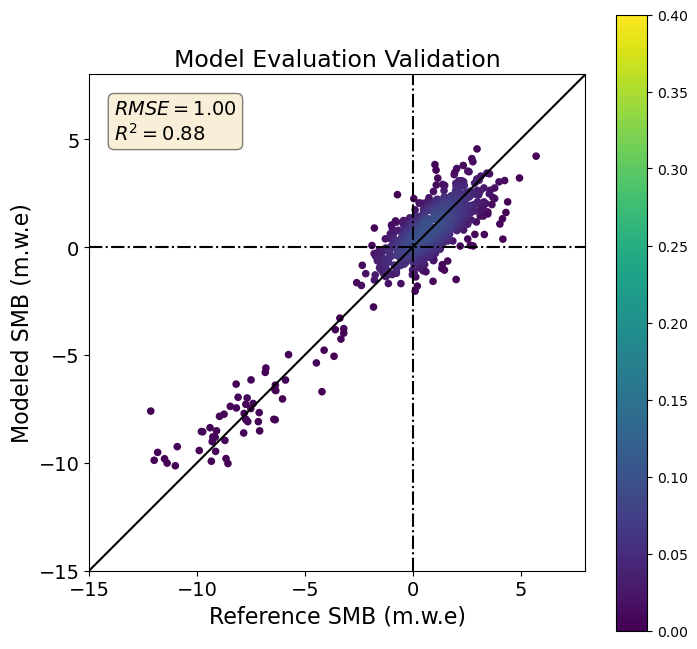

In [96]:
# Plot validation scores for each of the k folds together.

y_test_list = []
y_pred_list = []

for train_index, test_index in kf.split(X_train_scaled, y_train):
    # Loops over n_splits iterations and gets train and test splits in each fold
    X_train1, X_test1 = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]
    elastic_model.fit(X_train1, y_train1)
    y_pred = elastic_model.predict(X_test1)

    y_test_list.extend(y_test1)
    y_pred_list.extend(y_pred)

# Arrays of predictions and observations for each fold
y_test_all = np.hstack([*y_test_list])
y_pred_all = np.hstack([*y_pred_list])

# Plot predictions and observations for each cross-valiadation fold together
plot_prediction(y_test_all, y_pred_all, 'Validation', n_toplot=5000)

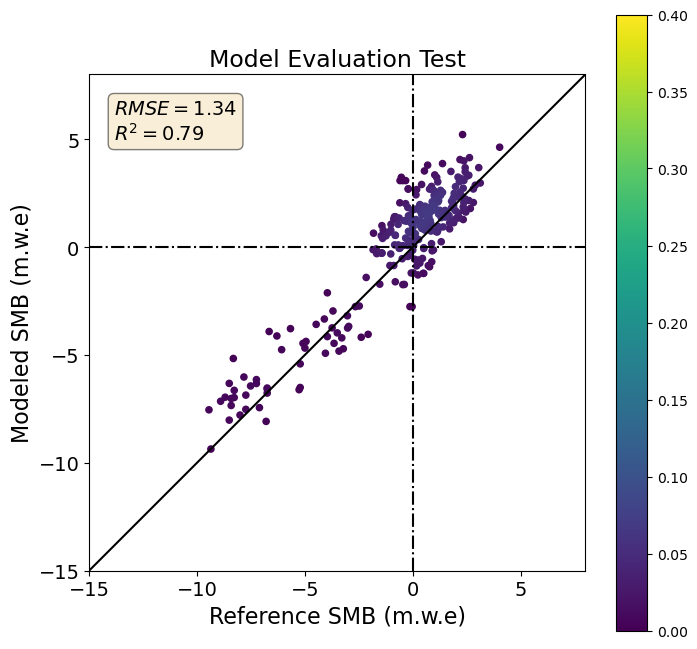

In [97]:
#plot_prediction(y_test, elastic.predict(X_test_scaled), 'Test', n_toplot=5000)

# Predict on hold-out test set and plot predictions
elastic_model.fit(X_train_scaled, y_train)
y_pred_test = elastic_model.predict(X_test_scaled)

plot_prediction(y_test, y_pred_test, 'Test', n_toplot=5000)

### XGBoost model

Using cross-validation with 5 folds (80/20 split).


In [98]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

In [99]:
# Create Kfold iterator for given number of splits
num_splits = 5
kf = KFold(n_splits=num_splits) # size of the test set will be 1/K (i.e. 1/n_splits); 1/5 = 0.2, 1/10 = 0.1
kf
#idcs = kf.split(X_train, y_train)

# Iterator using ShuffleSplit
#test_size = 0.2
#train_size = 0.8
#ss = ShuffleSplit(n_splits=10, test_size=test_size, train_size=train_size, random_state=5)
#ss.split(X_train, y_train)
#for train_index, test_index in ss.split(X_train, y_train):
#    print("%s" % (train_index))
#    print("%s" % (test_index))
#np.sum(np.isnan(y_test1))

KFold(n_splits=5, random_state=None, shuffle=False)

In [100]:
# Grid search with range of hyperparameter values to find best performing
# parameter set.

xgb_model = xgb.XGBRegressor()

# Define parameter ranges.
params = {'max_depth': [2, 3, 4, 5, 6, 7, 8],
          'n_estimators': [10, 20, 30, 40, 50],#, 100, 150, 200],#, 250, 300, 350, 400], # number of trees (too many = overfitting, too few = underfitting)
          'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}

clf = GridSearchCV(xgb_model, 
                   params, 
                   cv=kf, # Int or iterator
                   verbose=1, # Controls number of messages
                   n_jobs=4, # No of parallell jobs
                   scoring='neg_mean_squared_error', # Can use multiple metrics
                   refit=True, # Default True. For multiple metric evaluation, refit must be str denoting scorer to be used to find the best parameters for refitting the estimator.
                   return_train_score=True) # Default False. If False, cv_results_ will not include training scores.

# Fit model to folds
clf.fit(X_train, y_train)

# Get results of grid search
results = clf.cv_results_
print('Cross validation test score: ', clf.best_score_)
print('Cross validation test score: ', results['mean_test_score'].max())
print('Cross validation train score: ', results['mean_train_score'].max())
print('Grid search best hyperparameters: ', clf.best_params_)

results.keys()

Fitting 5 folds for each of 245 candidates, totalling 1225 fits
Cross validation test score:  -1.1600013292890132
Cross validation test score:  -1.1600013292890132
Cross validation train score:  -0.0005681392034207084
Grid search best hyperparameters:  {'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 50}


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [101]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

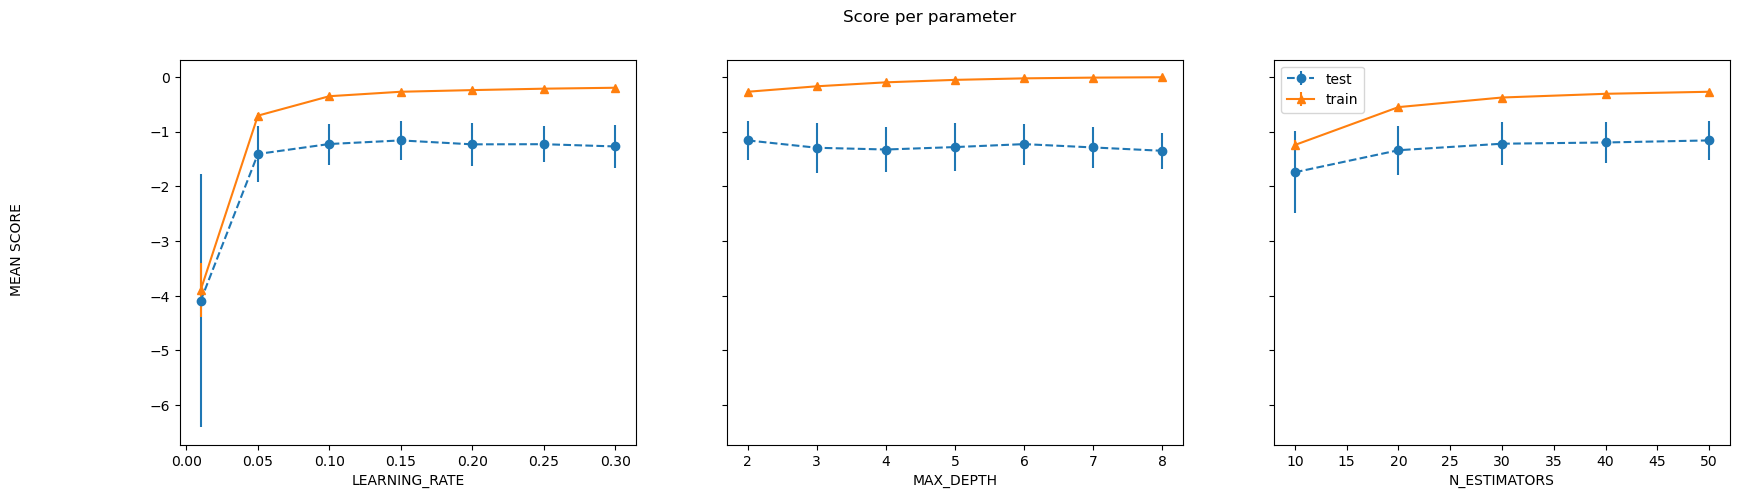

In [102]:
plot_search_results(clf)

In [103]:
#df_results_cv = pd.DataFrame.from_dict(results)

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
#ax1.set_xlabel("n_estimators")
#ax1.set_ylabel("Score")
#ax2.set_xlabel("n_estimators")
#ax2.set_ylabel("Score")
#ax1.set_ylim(-3, 0)
#ax2.set_ylim(-0.55, -0.4)
#sns.boxplot(data=df_results_cv, x='param_n_estimators', y='mean_test_score', boxprops={"facecolor": (.4, .6, .8, .5)}, ax=ax1)
#sns.boxplot(data=df_results_cv, x='param_n_estimators', y='mean_test_score', boxprops={"facecolor": (.4, .6, .8, .5)}, ax=ax2)
#ax1.grid(True)
#ax2.grid(True)
#fig.suptitle("GridSearchCV evaluate n_estimators")

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
#ax1.set_xlabel("learning_rate")
#ax1.set_ylabel("Score")
#ax2.set_xlabel("learning_rate")
#ax2.set_ylabel("Score")
#ax1.set_ylim(-3, 0)
#ax2.set_ylim(-0.55, -0.4)
#sns.boxplot(data=df_results_cv, x='param_learning_rate', y='mean_test_score', boxprops={"facecolor": (.4, .6, .8, .2)}, ax=ax1)
#sns.boxplot(data=df_results_cv, x='param_learning_rate', y='mean_test_score', boxprops={"facecolor": (.4, .6, .8, .2)}, ax=ax2)
#ax1.grid(True)
#ax2.grid(True)
#fig.suptitle("GridSearchCV evaluate learning_rate")

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
#ax1.set_xlabel("max_depth")
#ax1.set_ylabel("Score")
#ax2.set_xlabel("max_depth")
#ax2.set_ylabel("Score")
#ax1.set_ylim(-3, 0)
#ax2.set_ylim(-0.55, -0.4)
#sns.boxplot(data=df_results_cv, x='param_max_depth', y='mean_test_score', boxprops={"facecolor": (.4, .6, .8, .7)}, ax=ax1)
#sns.boxplot(data=df_results_cv, x='param_max_depth', y='mean_test_score', boxprops={"facecolor": (.4, .6, .8, .7)}, ax=ax2)
#ax1.grid(True)
#ax2.grid(True)
#fig.suptitle("GridSearchCV evaluate max_depth")

In [104]:
# Get best hyperparameters from grid search.
params_best = clf.best_params_

# Define model object with best hyperparameters.
xgb_model = xgb.XGBRegressor(learning_rate = params_best['learning_rate'], 
                             n_estimators = params_best['n_estimators'],
                             max_depth = params_best['max_depth'])



In [105]:
from sklearn.model_selection import cross_val_score

cvl = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

print('Cross validation scores: ', cvl)
print('Mean score: ', cvl.mean())
print('Standard deviation: ', cvl.std())

Cross validation scores:  [-1.45536472 -1.39256972 -0.47727944 -1.2589546  -1.21583816]
Mean score:  -1.1600013292890132
Standard deviation:  0.3522346556317854


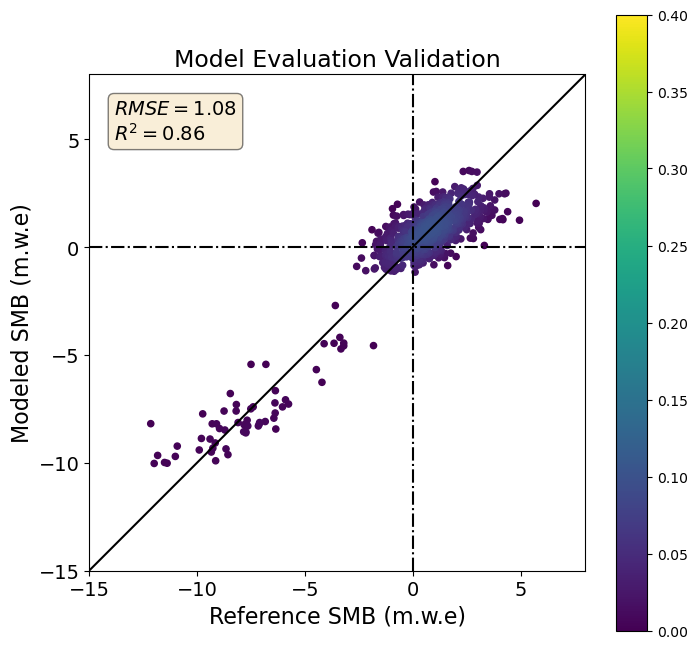

In [106]:
# Plot validation scores for each of the k folds together.

y_test_list = []
y_pred_list = []

for train_index, test_index in kf.split(X_train, y_train):
    # Loops over n_splits iterations and gets train and test splits in each fold
    X_train1, X_test1 = X_train[train_index], X_train[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]
    xgb_model.fit(X_train1, y_train1)
    y_pred = xgb_model.predict(X_test1)

    y_test_list.extend(y_test1)
    y_pred_list.extend(y_pred)

# Arrays of predictions and observations for each fold
y_test_all = np.hstack([*y_test_list])
y_pred_all = np.hstack([*y_pred_list])

# Plot predictions and observations for each cross-valiadation fold together
plot_prediction(y_test_all, y_pred_all, 'Validation', n_toplot=5000)

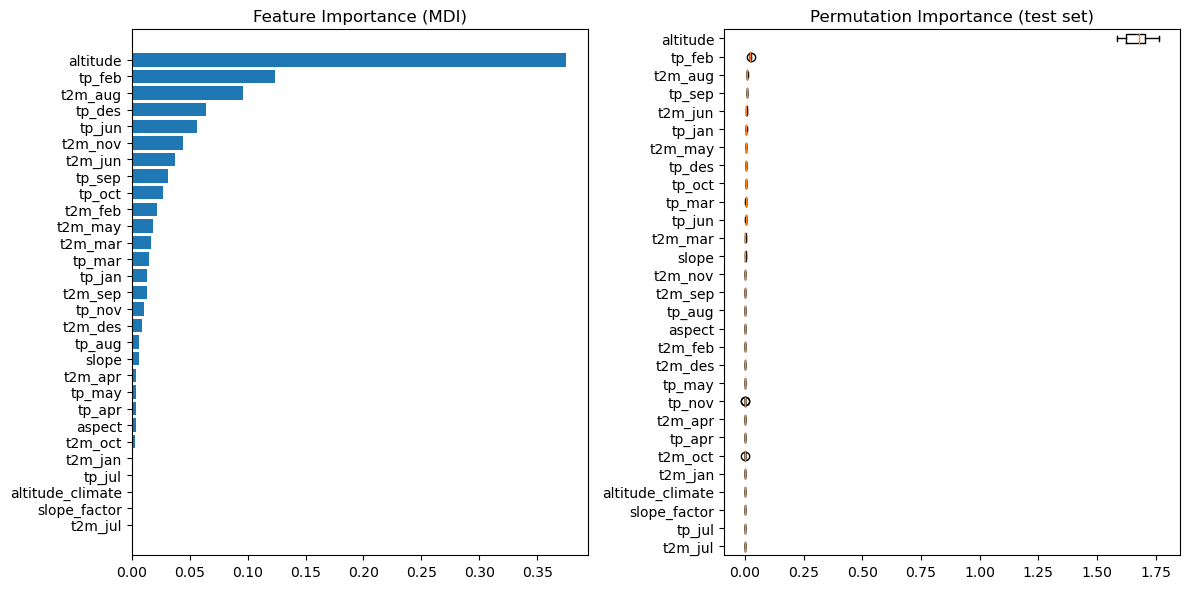

In [107]:
from sklearn.inspection import permutation_importance

xgb_model.fit(X_train, y_train)
feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_train_X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    xgb_model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_train_X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

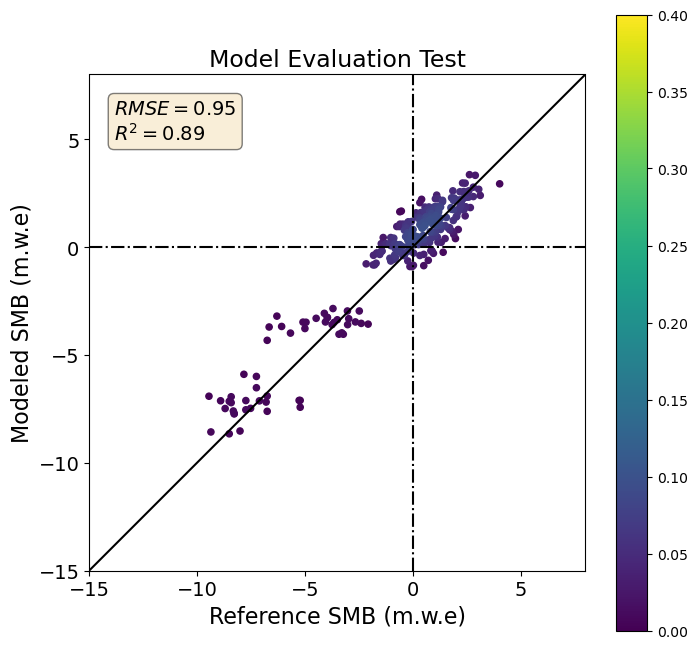

In [108]:
# Predict on hold-out test set and plot predictions
xgb_model.fit(X_train, y_train)
y_pred_test = xgb_model.predict(X_test)

plot_prediction(y_test, y_pred_test, 'Test', n_toplot=5000)

### Summary FOR RANDOM SPLITS (NOT TEMPORAL BLOCKING)

k-fold validation score ElasticNet: <br>
MSE=0.68, R2=0.92 <br>
test score ElasticNet: <br>
MSE=0.86, R2=0.90

k-fold validation score XGBoost: <br>
MSE=0.41, R2=0.95 <br>
test score XGBoost: <br>
MSE=0.56, R2=0.93

## Model training with k-fold cross-validation for Nigardsbreen, more climate features


### Run from here to create training and test sets

In [109]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [55]:
# Specify filepaths and filenames.
loc = 'local'

if loc == 'cryocloud':
    filepath = '/home/jovyan/ML_MB_Norway_data/'
elif loc == 'local':
    filepath = 'Data/'

filename = '2023-06-27_stake_mb_norway_cleaned_ids_latlon_wattributes_climate.csv'

# Load data.
data = pd.read_csv(filepath + filename)

In [56]:
# Make year column
data['year']=pd.to_datetime(data['dt_curr_year_max_date'].astype('string'), format="%d.%m.%Y %H:%M")
data['year'] = data.year.dt.year.astype('Int64')

# Get data for Nigardsbreen
glacier_data_all = data.loc[data['RGIID']=='RGI60-08.01126']

In [57]:
glacier_data_all = glacier_data_all[glacier_data_all['balance_netto'].notna()]
glacier_data_all.shape

(913, 302)

In [21]:
#glacier_data.columns.to_list()

In [59]:
# Sort values by year
glacier_data_all = glacier_data_all.sort_values(by=['year'])
glacier_data_all.reset_index(drop=True, inplace=True)
glacier_data_all

,RGIID,GLIMSID,BREID,utm_zone,utm_east_approx,utm_north_approx,altitude_approx,location_description,location_id,stake_no,...,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep,altitude_climate,year
0,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N100062,...,0.008103,0.001171,0.001844,0.001825,0.004144,0.001378,0.005737,0.005100,1322.716089,1962
1,RGI60-08.01126,G007099E61715N,2297,32,402850.0,6845050.0,1590.0,NaN,N82,N8262,...,0.008103,0.001171,0.001844,0.001825,0.004144,0.001378,0.005737,0.005100,1322.716089,1962
2,RGI60-08.01126,G007099E61715N,2297,32,402450.0,6844000.0,1465.0,NaN,N55,N4262,...,0.008103,0.001171,0.001844,0.001825,0.004144,0.001378,0.005737,0.005100,1322.716089,1962
3,RGI60-08.01126,G007099E61715N,2297,32,402950.0,6843100.0,1325.0,NaN,N53,N5362,...,0.008103,0.001171,0.001844,0.001825,0.004144,0.001378,0.005737,0.005100,1322.716089,1962
4,RGI60-08.01126,G007099E61715N,2297,32,404165.0,6841115.0,728.0,NaN,N9,N962,...,0.008103,0.001171,0.001844,0.001825,0.004144,0.001378,0.005737,0.005100,1322.716089,1962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,RGI60-08.01126,G007099E61715N,2297,32,396170.0,6839900.0,1960.0,Høgste Breakulen,N57,N5720,...,0.011448,0.007630,0.005808,0.003667,0.002686,0.006168,0.005873,0.009381,1362.652086,2020
909,RGI60-08.01126,G007099E61715N,2297,32,401030.0,6846640.0,1760.0,I bakken øst for Kjenndalskruna,N96,N9620,...,0.011006,0.007420,0.005654,0.003576,0.002486,0.005996,0.005606,0.009144,1382.210502,2020
910,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N100019,...,0.010563,0.007209,0.005500,0.003485,0.002285,0.005823,0.005338,0.008905,1322.716089,2020
911,RGI60-08.01126,G007099E61715N,2297,32,404575.0,6840375.0,575.0,Nederst på bretunga,N600,N60019,...,0.010563,0.007209,0.005500,0.003485,0.002285,0.005823,0.005338,0.008905,1322.716089,2020


In [60]:
# Select columns to drop

drop_cols = ['RGIID','BREID','GLIMSID','utm_zone','utm_east_approx','utm_north_approx','altitude_approx',
             'location_description','location_id','stake_no','utm_east','utm_north',
            'balance_winter','balance_summer','dt_prev_year_min_date','dt_curr_year_max_date',
            'dt_curr_year_min_date','stake_remark','flag_correction','approx_loc','approx_altitude',
            'diff_north','diff_east','diff_altitude','diff_netto','lat','lon','lat_approx','lon_approx',
            'topo','dis_from_border','year']

glacier_data = glacier_data_all.drop(drop_cols, axis=1)
glacier_data.shape

(913, 270)

In [61]:
glacier_data.reset_index(drop=True, inplace=True)
glacier_data

,altitude,balance_netto,aspect,slope,slope_factor,u10_oct,u10_nov,u10_des,u10_jan,u10_feb,...,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep,altitude_climate
0,925.0,-3.59,2.273733,0.175035,2.845278,-0.725681,-0.350067,-0.298366,-0.421476,-0.102990,...,0.008573,0.008103,0.001171,0.001844,0.001825,0.004144,0.001378,0.005737,0.005100,1322.716089
1,1578.0,2.50,3.127988,0.041331,3.872423,-0.725681,-0.350067,-0.298366,-0.421476,-0.102990,...,0.008573,0.008103,0.001171,0.001844,0.001825,0.004144,0.001378,0.005737,0.005100,1322.716089
2,1460.0,1.71,2.502458,0.056135,3.872423,-0.725681,-0.350067,-0.298366,-0.421476,-0.102990,...,0.008573,0.008103,0.001171,0.001844,0.001825,0.004144,0.001378,0.005737,0.005100,1322.716089
3,1346.0,0.94,3.433211,0.245217,2.324180,-0.725681,-0.350067,-0.298366,-0.421476,-0.102990,...,0.008573,0.008103,0.001171,0.001844,0.001825,0.004144,0.001378,0.005737,0.005100,1322.716089
4,735.0,-4.47,2.075310,0.213754,2.523782,-0.725681,-0.350067,-0.298366,-0.421476,-0.102990,...,0.008573,0.008103,0.001171,0.001844,0.001825,0.004144,0.001378,0.005737,0.005100,1322.716089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,1950.0,3.06,0.852260,0.048991,3.872423,-0.273230,-0.745104,-0.387771,0.063823,-0.222958,...,0.015431,0.011448,0.007630,0.005808,0.003667,0.002686,0.006168,0.005873,0.009381,1362.652086
909,1752.0,2.25,3.307029,0.055573,3.872423,-0.250379,-0.711970,-0.357779,0.068679,-0.227814,...,0.015007,0.011006,0.007420,0.005654,0.003576,0.002486,0.005996,0.005606,0.009144,1382.210502
910,964.0,-3.74,2.465503,0.152608,3.089254,-0.224386,-0.672266,-0.325787,0.074106,-0.232098,...,0.014583,0.010563,0.007209,0.005500,0.003485,0.002285,0.005823,0.005338,0.008905,1322.716089
911,609.0,-7.25,3.036208,0.152030,3.096297,-0.224386,-0.672266,-0.325787,0.074106,-0.232098,...,0.014583,0.010563,0.007209,0.005500,0.003485,0.002285,0.005823,0.005338,0.008905,1322.716089


In [62]:
# Random split

#idcs = glacier_data.index.values

#glacier_train, glacier_test = train_test_split(idcs, test_size=0.30, random_state=0)
                                               #train_size=0.7,
                                               #test_size=0.3)

#df_train_all = glacier_data.loc[glacier_train]
#df_test = glacier_data.loc[glacier_test]

In [63]:
# Temporal blocking

idcs = glacier_data.index.values

glacier_train, glacier_test = train_test_split(idcs, test_size=0.30, shuffle=False)
                                               #train_size=0.7,
                                               #test_size=0.3)

# 30% of data is withheld for testing, corresponds to last 30% in dataframe - i.e. last years
df_train_all = glacier_data.loc[glacier_train]
df_test = glacier_data.loc[glacier_test]

In [64]:
df_train_all.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [65]:
# Save test and training+validation dataset
df_test.to_csv(filepath + 'train_test/data_test_nigardsbreen_allclimate_temporal.csv')
df_train_all.to_csv(filepath + 'train_test/data_train_all_nigardsbreen_allclimate_temporal.csv')

### Run from here to load training and test sets

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Load training and validation datasets
filepath = 'Data/'

df_train = pd.read_csv(filepath + 'train_test/data_train_all_nigardsbreen_allclimate_temporal.csv', index_col=0)
df_test = pd.read_csv(filepath + 'train_test/data_test_nigardsbreen_allclimate_temporal.csv', index_col=0)

In [3]:
df_train

,altitude,balance_netto,aspect,slope,slope_factor,u10_oct,u10_nov,u10_des,u10_jan,u10_feb,...,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep,altitude_climate
0,1870.0,2.13,1.478597,0.072180,3.872423,-0.510595,0.046399,-0.422904,-0.613996,0.203214,...,0.004952,0.003765,0.004185,0.001821,0.000777,0.004347,0.002090,0.004416,0.005844,1382.210502
1,1594.0,-0.46,3.765552,0.073791,3.872423,-0.911916,-0.408622,-0.579720,-0.686548,-0.789663,...,0.002525,0.000702,0.003028,0.003114,0.001872,0.003864,0.004630,0.004887,0.006896,1322.716089
2,1589.0,-1.89,6.218546,0.038189,3.872423,-0.689976,-0.450611,-0.414050,-0.450897,-0.567152,...,0.002322,0.002534,0.001683,0.003321,0.001813,0.004296,0.005359,0.005201,0.008775,1322.716089
3,1802.0,1.27,0.943172,0.059008,3.872423,-0.802232,-0.446041,0.079818,-0.783665,-0.544586,...,0.004001,0.003978,0.001794,0.005173,0.002037,0.001994,0.008487,0.005749,0.008732,1382.210502
4,1618.0,-1.25,0.159165,0.088595,3.872423,-0.227528,-0.867357,-0.619995,-0.395198,-0.122128,...,0.002990,0.003786,0.004159,0.002829,0.001939,0.002446,0.005685,0.007217,0.007370,1382.210502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,1674.0,0.42,1.600567,0.021091,3.872423,-0.258948,-0.331500,-0.300080,-0.602285,-0.202963,...,0.005262,0.004681,0.002939,0.003274,0.002463,0.003990,0.008137,0.008667,0.007338,1382.210502
635,1481.0,0.15,1.515518,0.116491,3.632652,-0.198107,-0.901919,-0.593430,-0.376917,-0.899063,...,0.007489,0.000399,0.009600,0.005047,0.001893,0.006551,0.004973,0.004753,0.003119,1322.716089
636,1592.0,-1.50,2.486672,0.151343,3.104727,-0.211532,-0.735964,-0.570865,-0.743390,-0.706828,...,0.005657,0.002251,0.003153,0.003520,0.001913,0.002004,0.007230,0.002486,0.009946,1382.210502
637,1670.0,0.73,2.483241,0.019474,3.872423,0.036687,-0.635419,-0.503169,-0.277800,-0.645988,...,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834,1382.210502


In [4]:
label = ['balance_netto']
snow_depth_m = ['sde_oct','sde_nov','sde_des','sde_jan','sde_feb','sde_mar','sde_apr','sde_may','sde_jun','sde_jul','sde_aug','sde_sep']
snow_density = ['rsn_oct','rsn_nov','rsn_des','rsn_jan','rsn_feb','rsn_mar','rsn_apr','rsn_may','rsn_jun','rsn_jul','rsn_aug','rsn_sep']
evaporation = ['es_oct','es_nov','es_des','es_jan','es_feb','es_mar','es_apr','es_may','es_jun','es_jul','es_aug','es_sep']

cols = [y for x in [label, snow_depth_m, snow_density, evaporation] for y in x]
                
df_train_X = df_train.drop(cols, axis=1)
df_train_y = df_train[label]

X_train, y_train = df_train_X.values, df_train_y.values

df_test_X = df_test.drop(cols, axis=1)
df_test_y = df_test[label]

X_test, y_test = df_test_X.values, df_test_y.values

### XGBoost model

In [5]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

In [71]:
# Create Kfold iterator for given number of splits
num_splits = 5
kf = KFold(n_splits=num_splits) # size of the test set will be 1/K (i.e. 1/n_splits); 1/5 = 0.2, 1/10 = 0.1
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [72]:
# Grid search with range of hyperparameter values to find best performing
# parameter set.

xgb_model = xgb.XGBRegressor()

# Define parameter ranges.
params = {'max_depth': [2, 3, 4, 5, 6, 7],
          'n_estimators': [50, 100, 150, 200, 250, 300],#, 350, 400], # number of trees (too many = overfitting, too few = underfitting)
          'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}

clf = GridSearchCV(xgb_model, 
                   params, 
                   cv=kf, # Int or iterator
                   verbose=1, # Controls number of messages
                   n_jobs=4, # No of parallell jobs
                   scoring='neg_mean_squared_error', # Can use multiple metrics
                   refit=True, # Default True. For multiple metric evaluation, refit must be str denoting scorer to be used to find the best parameters for refitting the estimator.
                   return_train_score=False) # Default False. If False, cv_results_ will not include training scores.

# Fit model to folds
clf.fit(X_train, y_train)

# Get results of grid search
results = clf.cv_results_
print('Cross validation test score: ', clf.best_score_)
print('Cross validation test score: ', results['mean_test_score'].max())
#print('Cross validation train score: ', results['mean_train_score'].max())
print('Grid search best hyperparameters: ', clf.best_params_)

results.keys()

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
Cross validation test score:  -1.0301980138370603
Cross validation test score:  -1.0301980138370603
Grid search best hyperparameters:  {'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 200}


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [73]:
# Get best hyperparameters from grid search.
params_best = clf.best_params_

# Define model object with best hyperparameters.
xgb_model = xgb.XGBRegressor(learning_rate = params_best['learning_rate'], 
                             n_estimators = params_best['n_estimators'],
                             max_depth = params_best['max_depth'])

In [74]:
from sklearn.model_selection import cross_val_score

cvl = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

print('Cross validation scores: ', cvl)
print('Mean score: ', cvl.mean())
print('Standard deviation: ', cvl.std())

Cross validation scores:  [-1.47542178 -0.9675793  -0.91783854 -0.85774349 -0.93240696]
Mean score:  -1.0301980138370603
Standard deviation:  0.22542121185675473


In [41]:
# Get best hyperparameters from grid search.
#params_best = clf.best_params_

# Define model object with best hyperparameters.
#xgb_model = xgb.XGBRegressor(learning_rate = 0.15,
#                             max_depth = 2,
#                             n_estimators = 300)
    #learning_rate = params_best['learning_rate'], 
                             #n_estimators = params_best['n_estimators'],
                             #max_depth = params_best['max_depth'])


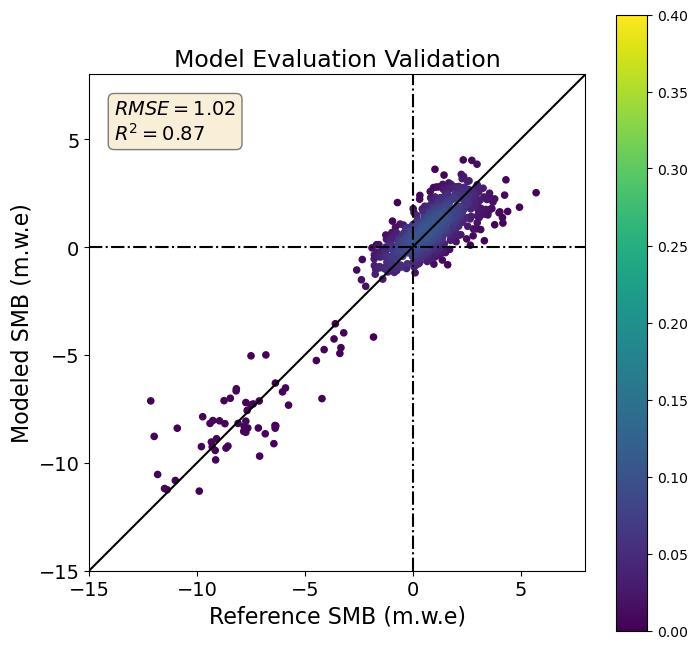

In [83]:
# Plot validation scores for each of the k folds together.

y_test_list = []
y_pred_list = []

for train_index, test_index in kf.split(X_train, y_train):
    # Loops over n_splits iterations and gets train and test splits in each fold
    X_train1, X_test1 = X_train[train_index], X_train[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]
    xgb_model.fit(X_train1, y_train1)
    y_pred = xgb_model.predict(X_test1)

    y_test_list.extend(y_test1)
    y_pred_list.extend(y_pred)

# Arrays of predictions and observations for each fold
y_test_all = np.hstack([*y_test_list])
y_pred_all = np.hstack([*y_pred_list])

# Plot predictions and observations for each cross-valiadation fold together
plot_prediction(y_test_all, y_pred_all, 'Validation', n_toplot=5000)

In [76]:
max_features_plot = 50

xgb_model.fit(X_train, y_train)
feature_importance = xgb_model.feature_importances_
ind = np.argpartition(feature_importance, -max_features_plot)[-max_features_plot:]

In [77]:
feature_importance_50 = feature_importance[ind]
sorted_idx = np.argsort(feature_importance_50)
feature_importance_50, sorted_idx

(array([0.00096552, 0.00097866, 0.00102989, 0.00106596, 0.00184419,
        0.00197541, 0.00189272, 0.00183676, 0.00154418, 0.00108072,
        0.00137472, 0.00185749, 0.00122502, 0.001319  , 0.00119409,
        0.00136132, 0.00189601, 0.00237634, 0.04383369, 0.00422743,
        0.01387476, 0.00713018, 0.01261836, 0.01013493, 0.00411818,
        0.00339295, 0.01948947, 0.0162737 , 0.02292593, 0.16256335,
        0.00725126, 0.00567282, 0.05389603, 0.1526484 , 0.02311879,
        0.00877949, 0.00388561, 0.00525758, 0.03024586, 0.02046994,
        0.09761939, 0.0096709 , 0.0754394 , 0.00266895, 0.01451268,
        0.01018697, 0.01033964, 0.00826493, 0.00914954, 0.07308837],
       dtype=float32),
 array([ 0,  1,  2,  3,  9, 14, 12, 13, 15, 10,  8,  7,  4, 11,  6, 16,  5,
        17, 43, 25, 36, 24, 19, 37, 31, 21, 30, 47, 35, 48, 41, 23, 45, 46,
        22, 20, 44, 27, 26, 39, 28, 34, 38, 18, 32, 49, 42, 40, 33, 29],
       dtype=int64))

In [78]:
y_cols = np.array(df_train_X.columns)[ind]
y_cols

array(['u10_may', 'fal_feb', 'sshf_des', 'sshf_mar', 'ssrd_jan', 'sf_apr',
       'strd_may', 'u10_des', 'ssrd_nov', 'ssr_oct', 't2m_may', 'ssr_jul',
       'sshf_sep', 'str_aug', 'tp_aug', 'fal_mar', 'tsn_aug', 'str_may',
       'ssrd_sep', 'v10_mar', 'ssrd_mar', 'ssrd_oct', 'sshf_jan',
       'sshf_oct', 'sp_mar', 'snowc_oct', 't2m_nov', 'v10_oct', 'str_jan',
       'tsn_feb', 'ssr_feb', 'ssr_jan', 't2m_aug', 'slhf_jul', 'u10_jun',
       'slhf_may', 'slhf_apr', 'slhf_feb', 'smlt_jul', 'sf_jun', 'sf_feb',
       'u10_jan', 'fal_jul', 'u10_nov', 'sf_oct', 'u10_oct', 'asn_oct',
       'asn_jun', 'asn_aug', 'altitude'], dtype=object)

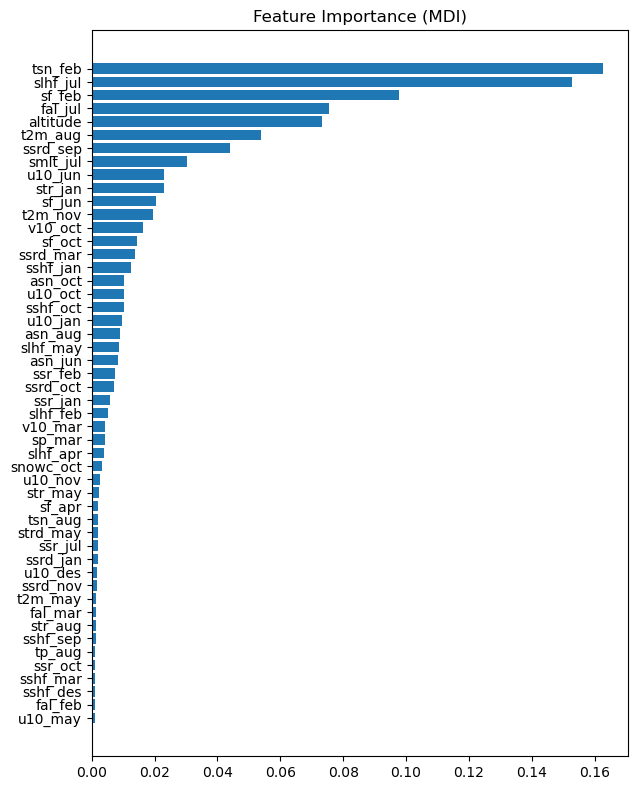

In [79]:
from sklearn.inspection import permutation_importance



#sorted_idx = np.argsort(feature_importance)
#mask = sorted_idx < 50
#sorted_idx = sorted_idx[mask]
pos = np.arange(sorted_idx.shape[0]) + 0.5

#feature_importance
#sorted_idx = np.argsort(feature_importance)
#sorted_idx
#pos = np.arange(sorted_idx.shape[0]) + 0.5
#pos
#t = np.argwhere(sorted_idx<50)
#t
#pos = np.arange(t.shape[0])+0.5

fig = plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance_50[sorted_idx], align="center")
#plt.barh(pos, feature_importance[t],align='center')
#plt.yticks(pos, np.array(df_train_X.columns)[sorted_idx])
plt.yticks(pos, y_cols[sorted_idx])
plt.title("Feature Importance (MDI)")

#result = permutation_importance(
#    xgb_model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
#)
#sorted_idx = result.importances_mean.argsort()
#plt.subplot(1, 2, 2)
#plt.boxplot(
#    result.importances[sorted_idx].T,
#    vert=False,
#    labels=np.array(df_train_X.columns)[sorted_idx],
#)
#plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

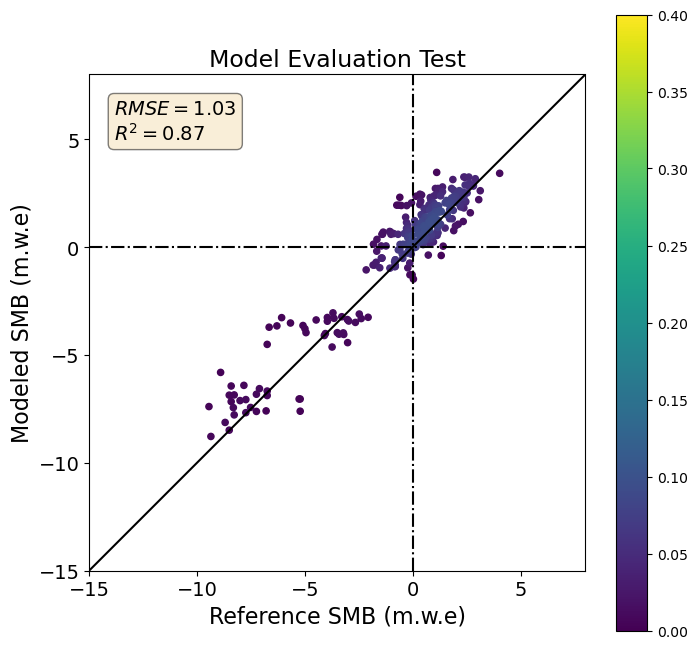

In [82]:
# Predict on hold-out test set and plot predictions
xgb_model.fit(X_train, y_train)
y_pred_test = xgb_model.predict(X_test)

plot_prediction(y_test, y_pred_test, 'Test', n_toplot=5000)

### Summary (RANDOM SPLITS, NOT TEMPORAL BLOCKING)

k-fold validation score XGBoost with only temp and prec: <br>
MSE=0.41, R2=0.95 <br>
test score XGBoost with only temp and prec: <br>
MSE=0.56, R2=0.93

k-fold validation score XGBoost with all climate features: <br>
MSE=0.38, R2=0.95 <br>
test score XGBoost with all climate features: <br>
MSE=0.50, R2=0.94

## Temporal blocking (as above), but with 10 folds


In [6]:
# Create Kfold iterator for given number of splits
num_splits = 10
kf = KFold(n_splits=num_splits) # size of the test set will be 1/K (i.e. 1/n_splits); 1/5 = 0.2, 1/10 = 0.1
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [7]:
# Grid search with range of hyperparameter values to find best performing
# parameter set.

xgb_model = xgb.XGBRegressor()

# Define parameter ranges.
params = {'max_depth': [2, 3, 4, 5, 6, 7],
          'n_estimators': [50, 100, 150, 200, 250, 300],#, 350, 400], # number of trees (too many = overfitting, too few = underfitting)
          'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}

clf = GridSearchCV(xgb_model, 
                   params, 
                   cv=kf, # Int or iterator
                   verbose=1, # Controls number of messages
                   n_jobs=4, # No of parallell jobs
                   scoring='neg_mean_squared_error', # Can use multiple metrics
                   refit=True, # Default True. For multiple metric evaluation, refit must be str denoting scorer to be used to find the best parameters for refitting the estimator.
                   return_train_score=False) # Default False. If False, cv_results_ will not include training scores.

# Fit model to folds
clf.fit(X_train, y_train)

# Get results of grid search
results = clf.cv_results_
print('Cross validation test score: ', clf.best_score_)
print('Cross validation test score: ', results['mean_test_score'].max())
#print('Cross validation train score: ', results['mean_train_score'].max())
print('Grid search best hyperparameters: ', clf.best_params_)

results.keys()

Fitting 10 folds for each of 252 candidates, totalling 2520 fits
Cross validation test score:  -0.888517560310472
Cross validation test score:  -0.888517560310472
Grid search best hyperparameters:  {'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 150}


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [8]:
# Get best hyperparameters from grid search.
params_best = clf.best_params_

# Define model object with best hyperparameters.
xgb_model = xgb.XGBRegressor(learning_rate = params_best['learning_rate'], 
                             n_estimators = params_best['n_estimators'],
                             max_depth = params_best['max_depth'])

In [9]:
from sklearn.model_selection import cross_val_score

cvl = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

print('Cross validation scores: ', cvl)
print('Mean score: ', cvl.mean())
print('Standard deviation: ', cvl.std())

Cross validation scores:  [-2.27116937 -0.80845947 -1.32569242 -0.86256549 -0.32329369 -0.93312139
 -0.48016515 -0.70741916 -0.71288492 -0.46040456]
Mean score:  -0.888517560310472
Standard deviation:  0.533392360531133


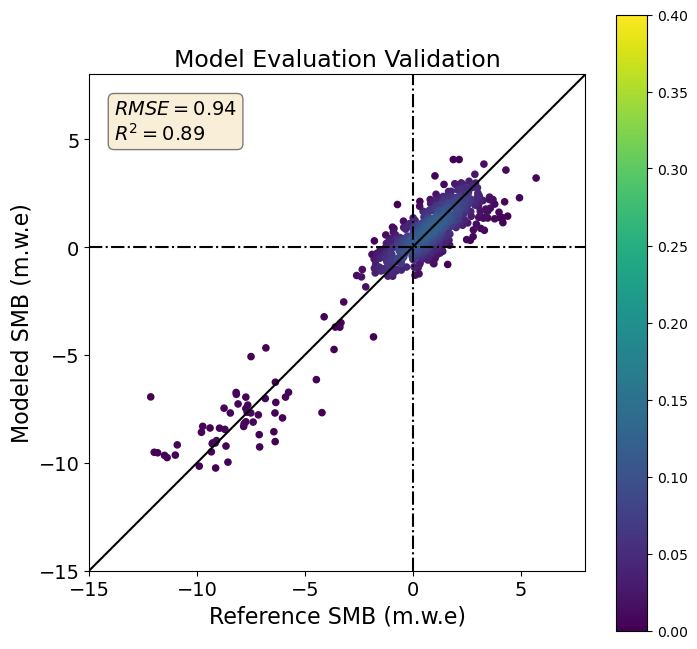

In [12]:
# Plot validation scores for each of the k folds together.

y_test_list = []
y_pred_list = []

for train_index, test_index in kf.split(X_train, y_train):
    # Loops over n_splits iterations and gets train and test splits in each fold
    X_train1, X_test1 = X_train[train_index], X_train[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]
    xgb_model.fit(X_train1, y_train1)
    y_pred = xgb_model.predict(X_test1)

    y_test_list.extend(y_test1)
    y_pred_list.extend(y_pred)

# Arrays of predictions and observations for each fold
y_test_all = np.hstack([*y_test_list])
y_pred_all = np.hstack([*y_pred_list])

# Plot predictions and observations for each cross-valiadation fold together
plot_prediction(y_test_all, y_pred_all, 'Validation', n_toplot=5000)

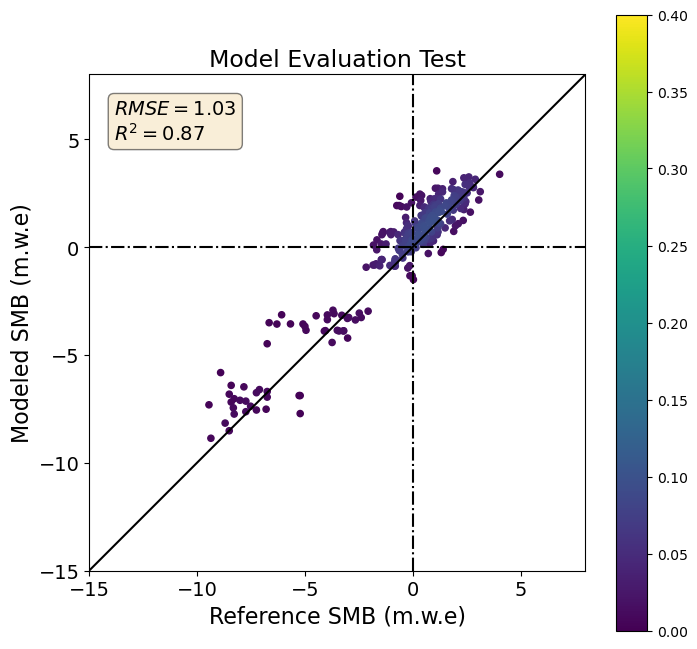

In [13]:
# Predict on hold-out test set and plot predictions
xgb_model.fit(X_train, y_train)
y_pred_test = xgb_model.predict(X_test)

plot_prediction(y_test, y_pred_test, 'Test', n_toplot=5000)